In [16]:
# KNN.py
from numpy import *
import operator

def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [17]:
group, labels = createDataSet()
group, labels

(array([[ 1. ,  1.1],
        [ 1. ,  1. ],
        [ 0. ,  0. ],
        [ 0. ,  0.1]]),
 ['A', 'A', 'B', 'B'])

In [54]:
def classify0(inX, dataSet, labels, k):
    
    # 计算距离
    data_set_size = dataSet.shape[0]
    diffMat = tile(inX, (data_set_size, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    
    # 选择距离最小的k个点
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClasscount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClasscount[0][0]

In [39]:
# test:
print('group.shape:', group.shape)

data_set_size = group.shape[0]
data_set_size


diffMat = tile(array([5,6]), (data_set_size, 1)) - group
print('diffMat:\n', diffMat)
sqdiffMat = diffMat**2
sqDistances = sqdiffMat.sum(axis=1)

print('sqDiffMat:\n', sqDistances)

sortedDistIndices = sqDistances.argsort()

print('sortedDiffMat:\n', sortedDistIndices)

classCount={}

voteIlabel = labels[sortedDistIndices[0]]
classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

print('class_count:\n', classCount)

group.shape: (4, 2)
diffMat:
 [[ 4.   4.9]
 [ 4.   5. ]
 [ 5.   6. ]
 [ 5.   5.9]]
sqDiffMat:
 [ 40.01  41.    61.    59.81]
sortedDiffMat:
 [0 1 3 2]
class_count:
 {'A': 1}


In [55]:
# predict
classify0([0, 0], group, labels, 3)

'B'

### K-近邻算法优化约会网站配对效果

In [56]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 删除头尾的空格或者换行符
        line = line.strip()
        
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [57]:
datingDataMat, datingLabels = file2matrix('./dataset/datingTestSet2.txt')
datingDataMat, datingLabels[0:20]

(array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
        [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
        [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
        ..., 
        [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
        [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
        [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]]),
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3])

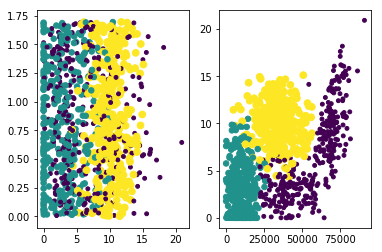

In [58]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(datingDataMat[:,1], datingDataMat[:, 2], 15.0 * array(datingLabels), 15.0 * array(datingLabels))
# ax.scatter(datingDataMat[:,1], datingDataMat[:, 2])

ax2 = fig.add_subplot(122)
ax2.scatter(datingDataMat[:,0], datingDataMat[:, 1], 15.0 * array(datingLabels), 15.0 * array(datingLabels))
# ax.scatter(datingDataMat[:,1], datingDataMat[:, 2])

plt.show()

In [59]:
def autoNorm(dataSet):
    minValues = dataSet.min(0)
    maxValues = dataSet.max(0)
    ranges = maxValues - minValues
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minValues, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minValues

In [60]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat, ranges, minVals

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

In [71]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('./dataset/datingTestSet2.txt')
    normMat, ranges, minValues = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        if (classifierResult != datingLabels[i]):
            print("the classifier come back with: %d, the real answer is: %d"%(classifierResult, datingLabels[i]))
            errorCount += 1.0
    print("error rate: %f"%(errorCount / float(numTestVecs)))

datingClassTest()

the classifier come back with: 3, the real answer is: 2
the classifier come back with: 3, the real answer is: 1
the classifier come back with: 3, the real answer is: 1
the classifier come back with: 2, the real answer is: 3
the classifier come back with: 3, the real answer is: 1
error rate: 0.050000


In [76]:
def classifyPerson():
    res_list = ['not at all', 'small doses', 'lage doses']
    tats = float(input("percentage time to play games?"))
    miles = float(input("frequent flier miles earned per year?"))
    icecream = float(input("icecream liters?"))
    datingDataMat, datingLabels = file2matrix('./dataset/datingTestSet2.txt')
    normMat, ranges, minValues = autoNorm(datingDataMat)
    inArr = array([miles, tats, icecream])
    classifierResult = classify0((inArr - minValues) / ranges, normMat, datingLabels, 3)
    print("you will probably like this person: ", res_list[classifierResult -1])

classifyPerson()

percentage time to play games?10
frequent flier miles earned per year?10000
icecream liters?0.5
you will probably like this person:  small doses
